# Capstone Project- Walmart Sales Prediction


**#Problem Statement:**

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

1. Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.

# Dataset
Walmart(1).csv

# Dataset Description

The walmart.csv contains 6435 rows and 8 columns. Feature Names and Description is as follows:

Store- Store Number

Date- Week of Sales

Weekly_Sales- Sales for the given store in that week

Holiday_Flag- If it is a holiday week

Temperature- Temperature on the day of the sale

Fuel_Price- Cost of the fuel in the region

CPI- Consumer Price Index

Unemployment- Unemployment Rate


# Part-1: Model Building

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
#loading Dataset
df=pd.read_csv('Walmart (1).csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [3]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
#Reframing Date into weekday, month & year
df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year
df.drop(columns=['Date'],axis=1,inplace=True)
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  weekday  month  year  
0         8.106        6      5  2010  
1         8.106        3     12  2010  
2         8.106        4      2  2010  
3         8.106        4      2  2010  
4         8.106        0      5  2010

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [6]:
df['year']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: year, Length: 6435, dtype: int64

In [7]:
df.shape

(6435, 10)

In [8]:
df.keys()

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

In [9]:
#Checking the unique rows & sort it
df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [10]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment      weekday        month         year  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151     3.573427     6.475524  2010.965035  
std      39.356712      1.875885     1.426581     3.321797     0.797019  
min     126.064000      3.879000     0.000000     1.000000  2010.000000  
25%     131.735000      6.891000     4.000000     4.000000  2010.000000  
50%     182.616521      7.874000     4.000000     6.000000  2011.000000  
75%     212.743293      8.622000     4.000000     9.000000  2012.000000  
max     227.232807     14.313000     6.000000    12.000000  2012.000000

In [11]:
df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   
weekday       6435.0  3.573427e+00       1.426581       0.000       4.000   
month         6435.0  6.475524e+00       3.321797       1.000       4.000   
year          6435.0  2.010965e+03       0.797019    2010.000    2010.000   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01  
weekday            4.000000  4.000000e+00  6.000000e+00  
month              6.000000  9.000000e+00  1.200000e+01  
year            2011.000000  2.012000e+03  2.012000e+03

# EDA-Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an important step in data analysis that involves understanding and visualizing the structure and characteristics of a dataset.

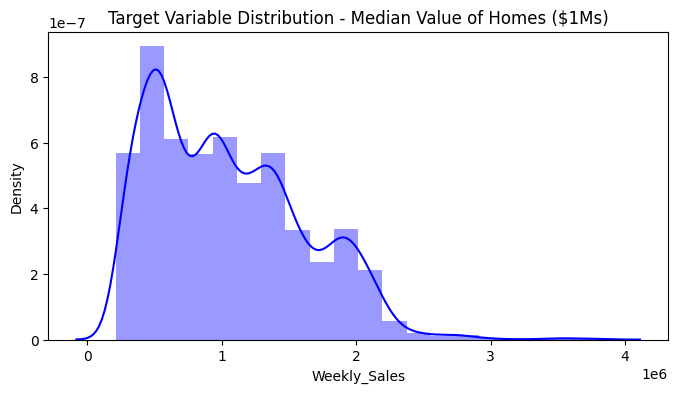

In [12]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df, x=df['Weekly_Sales'],color='blue',bins=20)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.xlabel('Weekly_Sales')
plt.show()

Data looks to be normally distributed


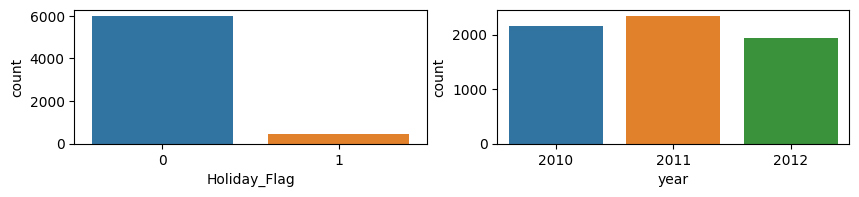

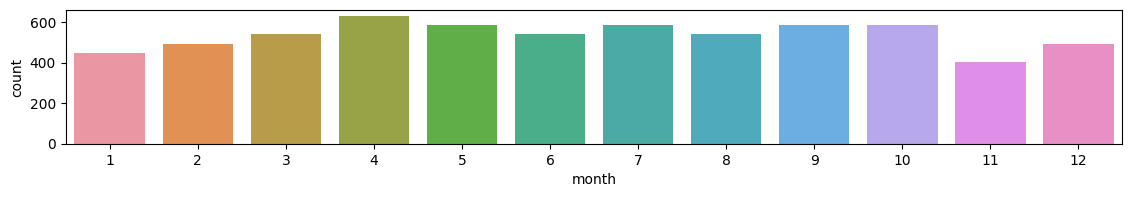

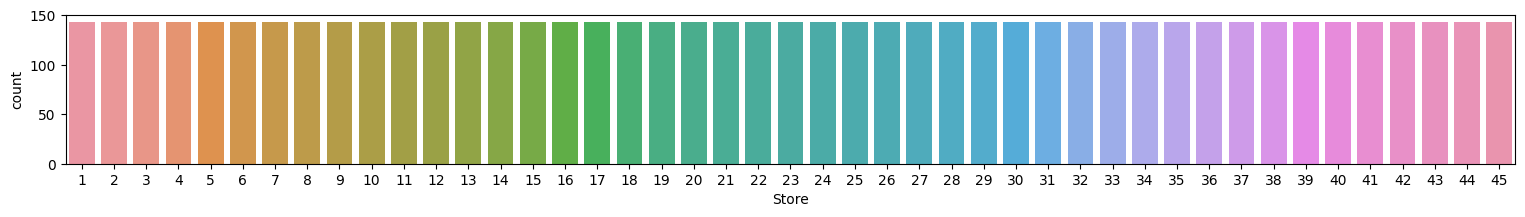

In [13]:
# Visualizing the categorical features
plt.figure(figsize=[10,8])
plt.subplot(4,2,1)
sns.countplot(x=df['Holiday_Flag'],data=df)
plt.subplot(4,2,2)
sns.countplot(x=df['year'],data=df)

plt.figure(figsize=[30,8])
plt.subplot(4,2,3)
sns.countplot(x=df['month'],data=df)

plt.figure(figsize=[30,8])
plt.subplot(4,2,4)
sns.countplot(x=df['Store'],data=df)

plt.tight_layout()

There are no categorical features as such.


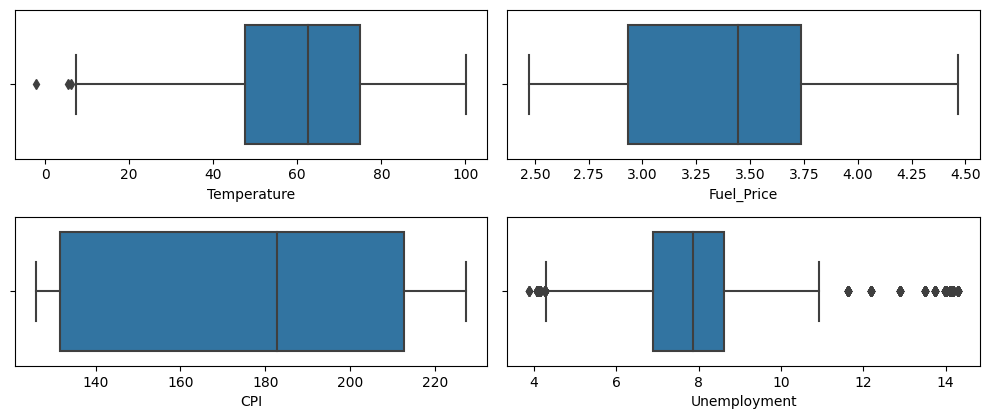

In [14]:
# Visualizing numerical features
plt.figure(figsize=[10,8])

plt.subplot(4,2,1)
sns.boxplot(data=df, x='Temperature')

plt.subplot(4,2,2)
sns.boxplot(data=df, x='Fuel_Price')

plt.subplot(4,2,3)
sns.boxplot(data=df, x='CPI')

plt.subplot(4,2,4)
sns.boxplot(data=df, x='Unemployment')

plt.tight_layout()

There are some outliers in the data, need to be fixed.


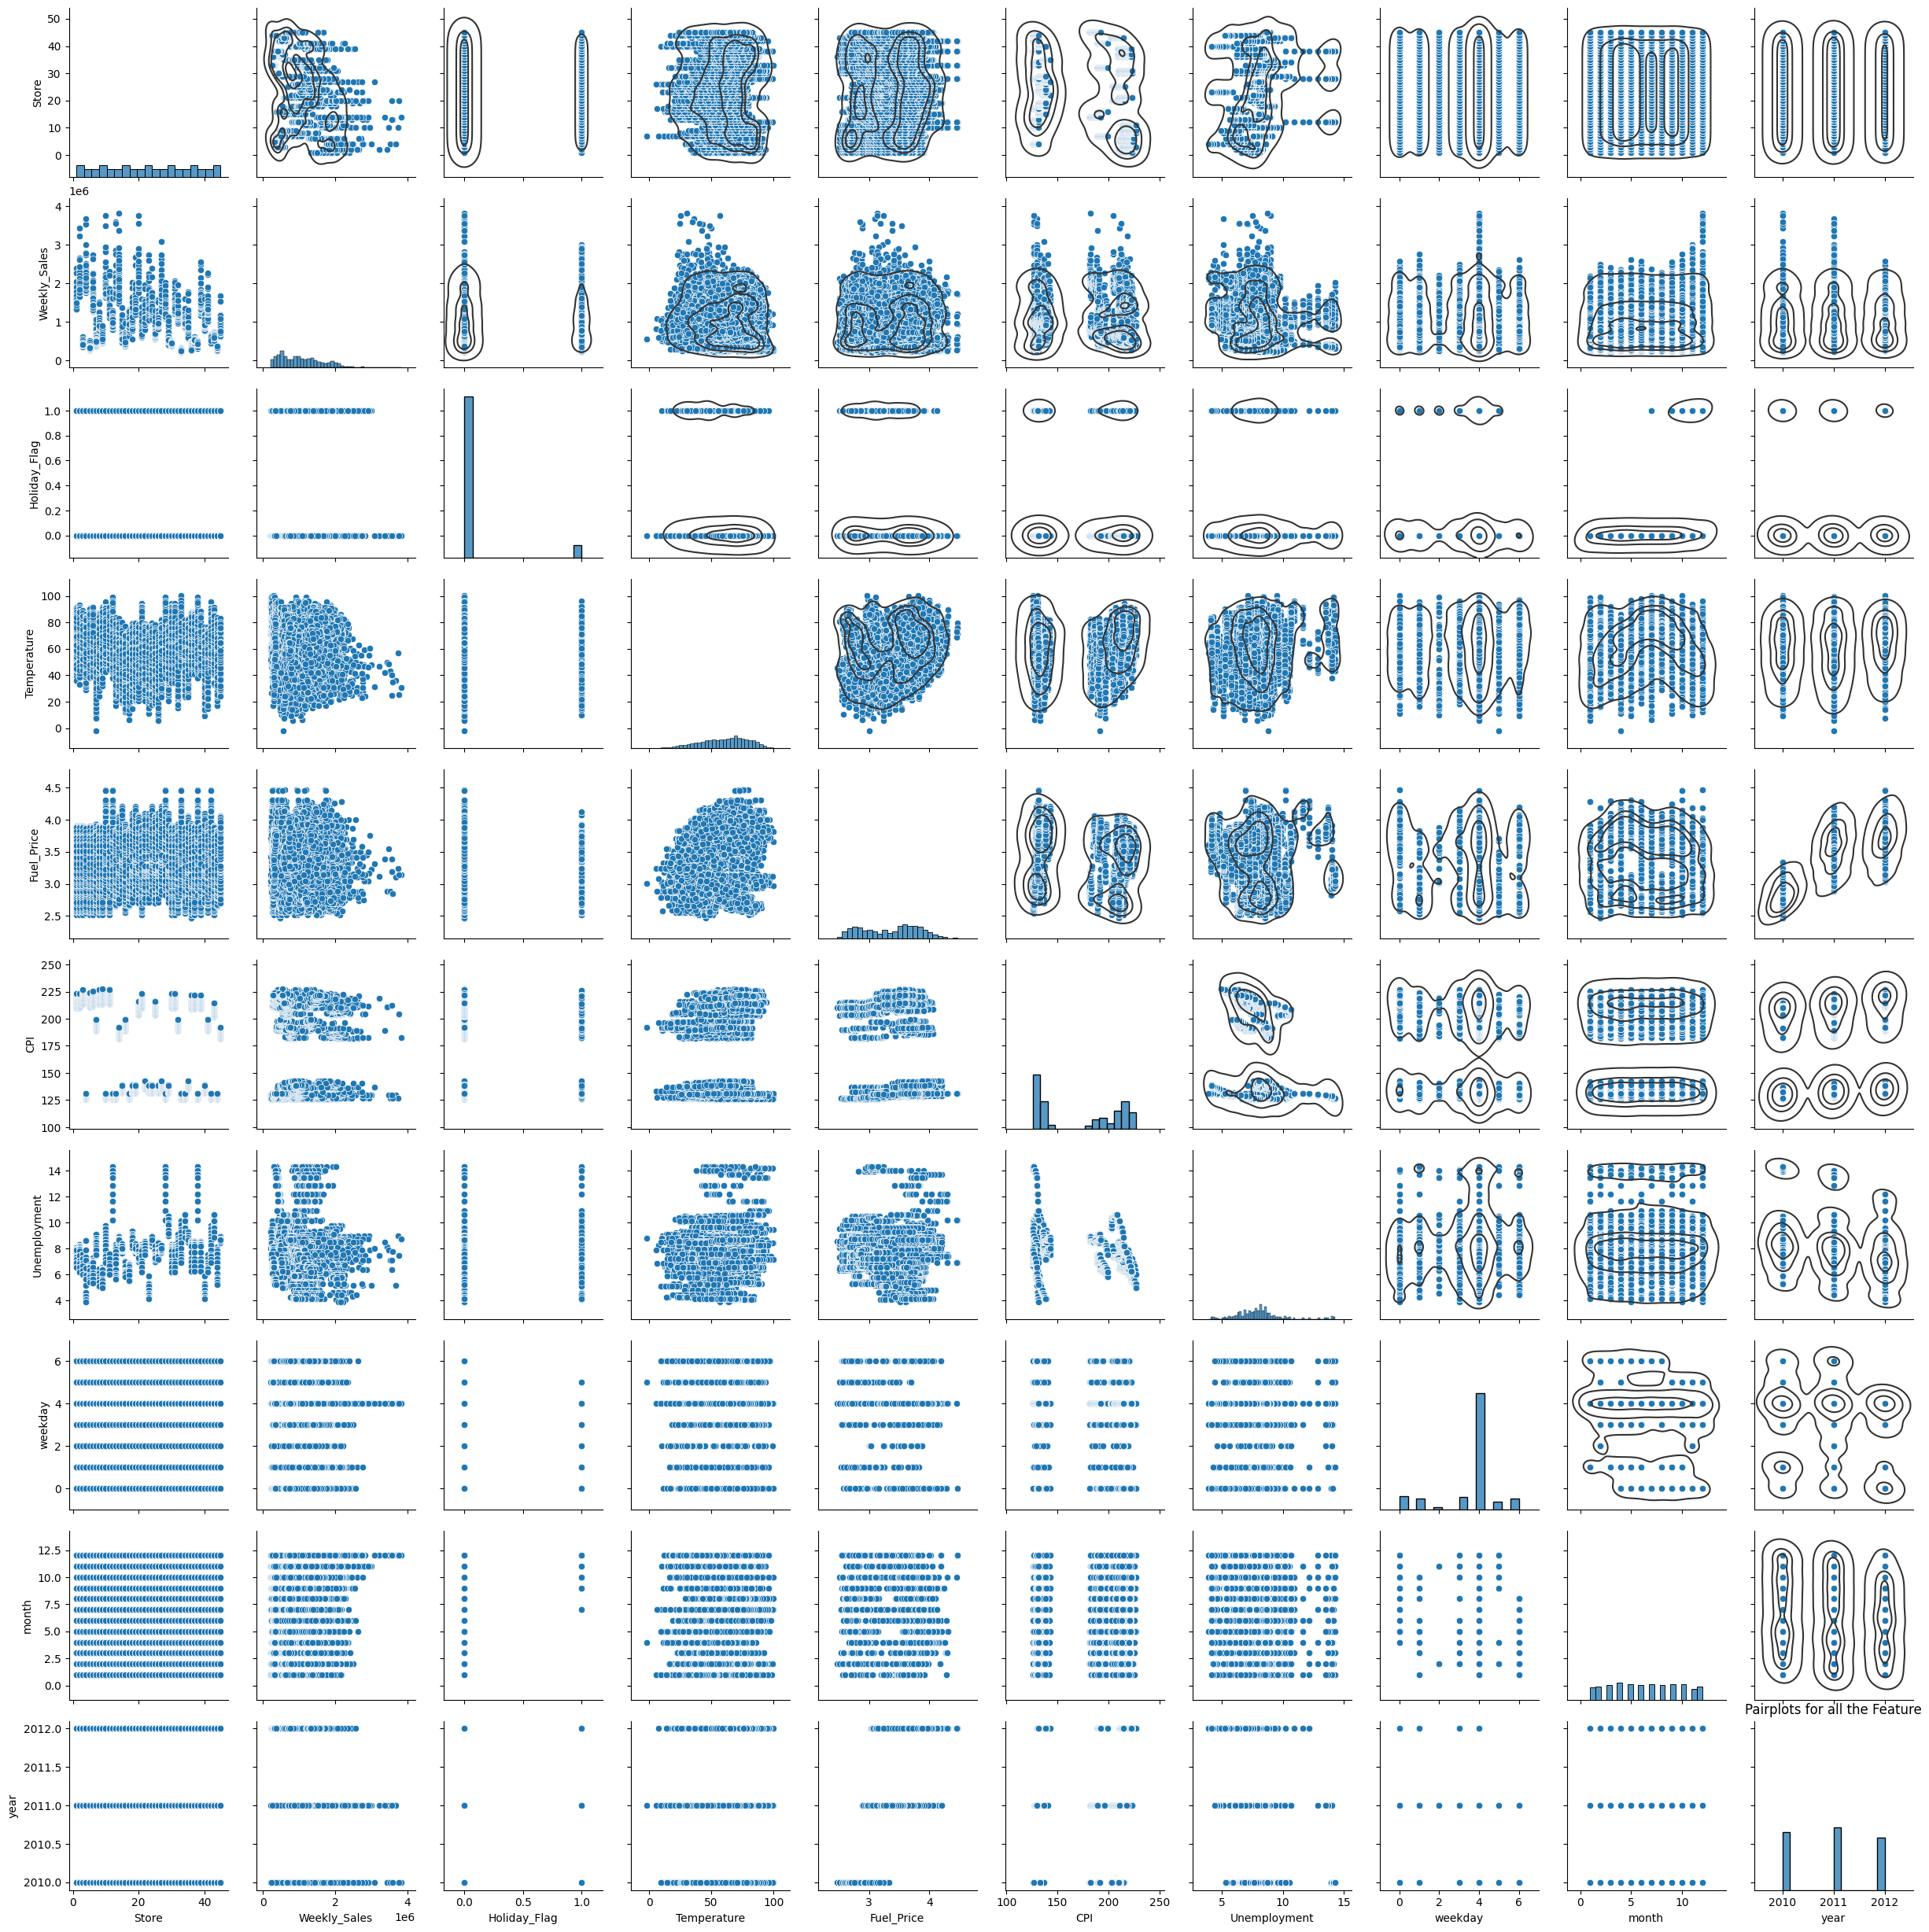

In [15]:
#Understanding the relationship between all the features
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

Some features have linear relationship

In [16]:
for i in df.columns:
    if df[i].dtypes=="object" or df[i].dtypes=="bool":
        print(i,df[i].unique())

In [17]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

Store


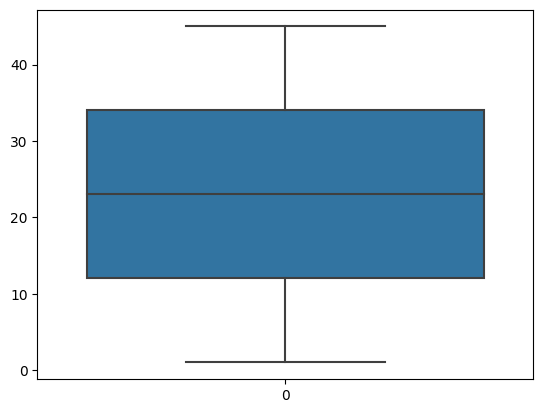

Weekly_Sales


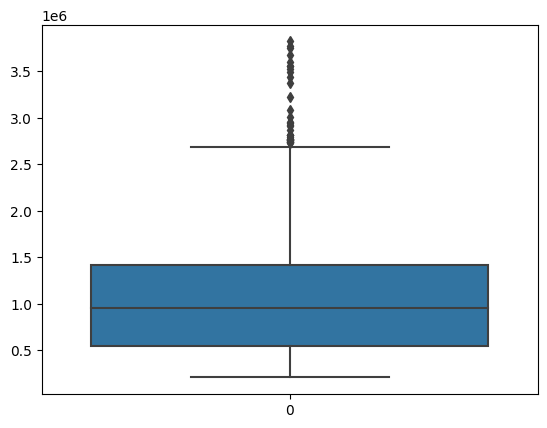

Holiday_Flag


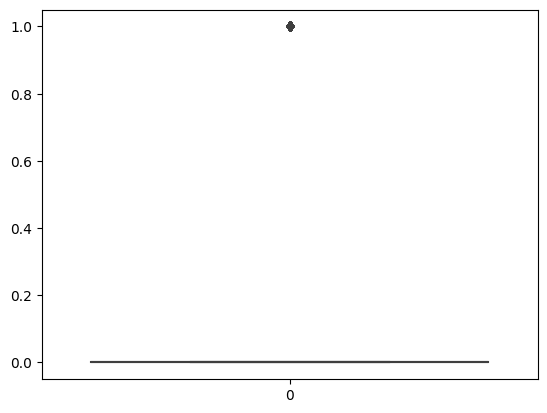

Temperature


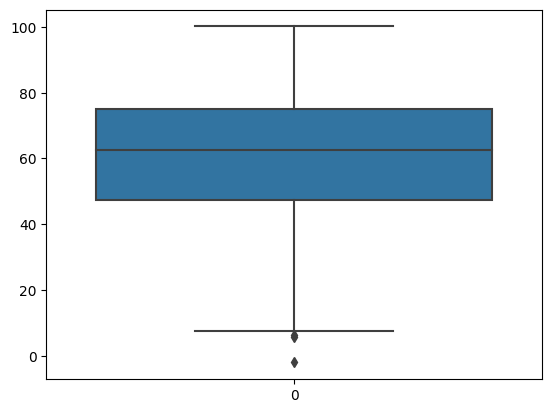

Fuel_Price


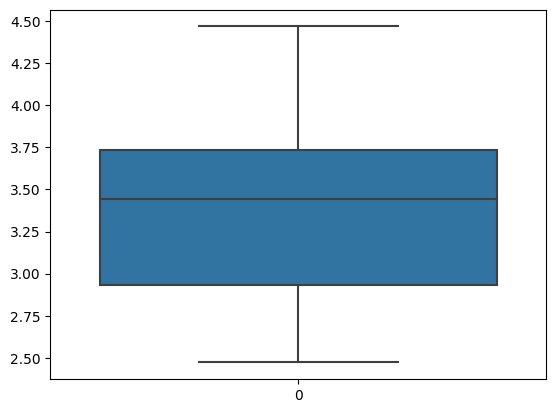

CPI


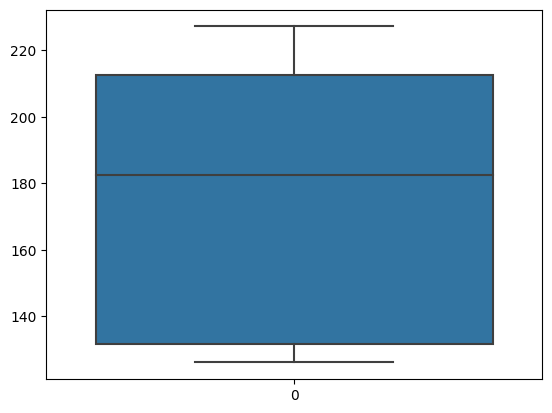

Unemployment


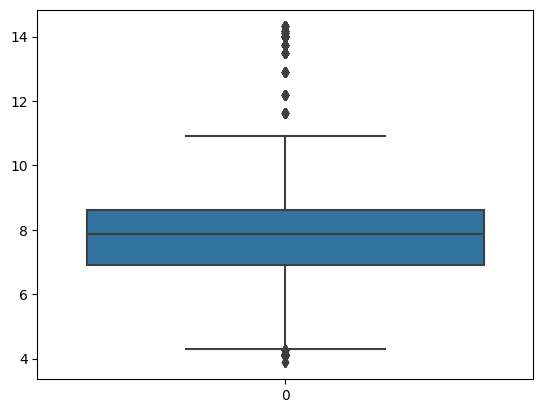

weekday


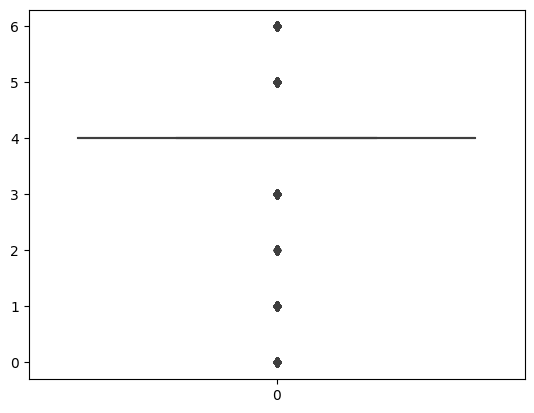

month


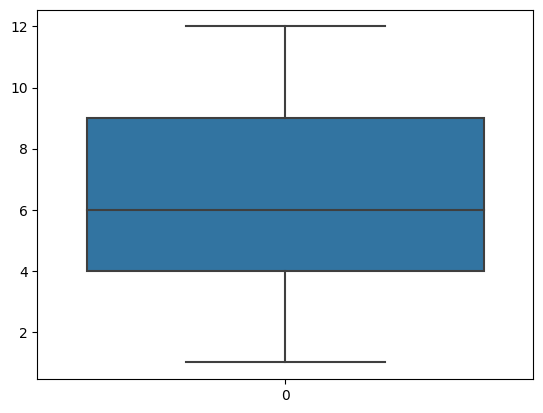

year


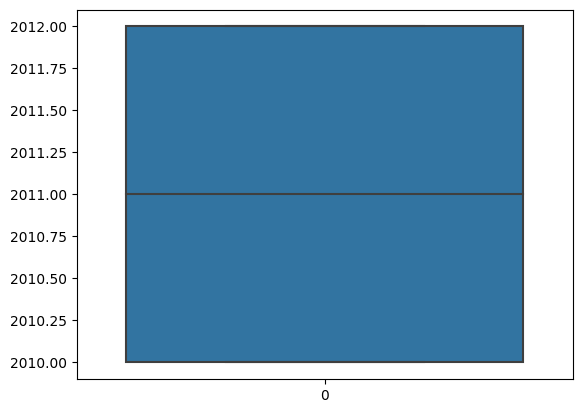

<Figure size 640x480 with 0 Axes>

In [18]:
for i in df.columns:
    if df[i].dtypes=="float64" or df[i].dtypes=="int64":
        sns.boxplot(df[i])
        print(i)
        plt.show()
        plt.tight_layout()

Weekly_Sales, Unemployment & Temperature are having Outliers

In [19]:
columns_outliers=['Weekly_Sales','Temperature','Unemployment']

In [20]:
for col in columns_outliers:
 Q1=df[col].quantile(0.25)
 Q3=df[col].quantile(0.75)
 IQR= Q3-Q1
 lower_limit= Q1 - 1.5 *IQR
 upper_limit = Q3 + 1.5 * IQR
 df1= df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]
df1

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90             0        42.31       2.572  211.096358   
1         1    1641957.44             1        38.51       2.548  211.242170   
2         1    1611968.17             0        39.93       2.514  211.289143   
3         1    1409727.59             0        46.63       2.561  211.319643   
4         1    1554806.68             0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0        54.47       4.000  192.327265   
6433     45     718125.53             0        56.47       3.969  192.330854   
6434     45     760281.43             0        58.85       3.882  192.308899   

      Unemployment  weekday  month  year  
0            8.106        6      5  2010  
1            8.106        3     12  2010  
2            8.106        4      2  2010  
3            8.106        4      2  2010  
4            8.106        0      5  2010  
...            ...      ...    ...   ...  
6430         8.684        4      9  2012  
6431         8.667        3      5  2012  
6432         8.667        0     12  2012  
6433         8.667        4     10  2012  
6434         8.667        4     10  2012  

[5954 rows x 10 columns]

# Data Preprocessing

In [21]:
#Checking null
values=df1.isnull().sum()
values

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

In [22]:
# Checking duplicate values
df1.duplicated().sum()

0

In [27]:
df1.shape

(5954, 10)

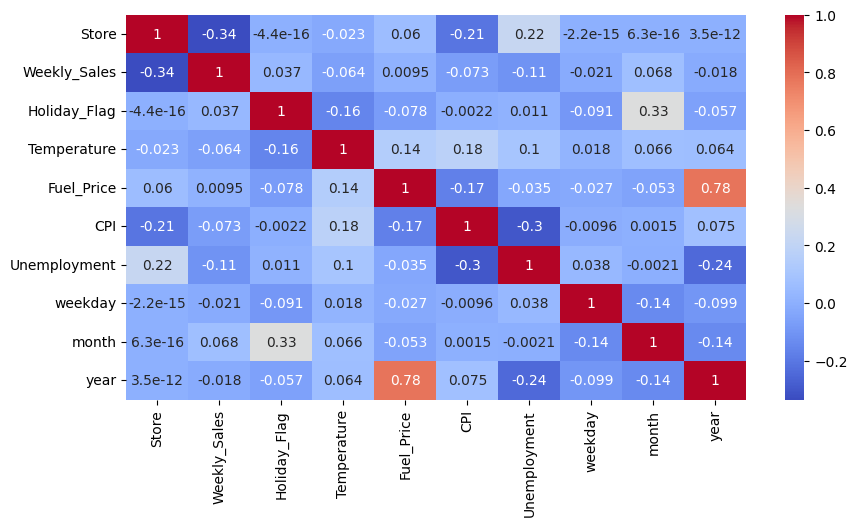

In [23]:
# Feature Selection
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

This shows the relation between all the features with Weekly_Sales.

# Feature Scaling (Standardization)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Weekly_Sales',axis=1))

StandardScaler()

In [25]:
scaled_features = scaler.transform(df1.drop('Weekly_Sales',axis=1))
scaled_features

array([[-1.69397911, -0.27420425, -0.99513556, ...,  1.70110303,
        -0.44422923, -1.21089907],
       [-1.69397911,  3.64691651, -1.20117022, ..., -0.40198976,
         1.66322793, -1.21089907],
       [-1.69397911, -0.27420425, -1.12417832, ...,  0.29904117,
        -1.34742516, -1.21089907],
       ...,
       [ 1.69397911, -0.27420425, -0.33582468, ..., -2.50508255,
         1.66322793,  1.29864538],
       [ 1.69397911, -0.27420425, -0.22738539, ...,  0.29904117,
         1.06109731,  1.29864538],
       [ 1.69397911, -0.27420425, -0.09834264, ...,  0.29904117,
         1.06109731,  1.29864538]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df1['Weekly_Sales'],test_size=0.30,random_state=42)

# Model Building


#1. Linear Regression

In [28]:
# Fitting Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
difference1=pd.DataFrame(np.c_[y_test,y_pred1],columns=['Actual_Value','Predicted_Value'])
difference1

Actual_Value  Predicted_Value
0       1408464.08     8.456013e+05
1       1141184.66     8.323359e+05
2        561137.06     1.233011e+06
3        377464.62     7.744962e+05
4       1867403.01     1.266753e+06
...            ...              ...
1782    2160057.39     1.420365e+06
1783     691497.62     1.258277e+06
1784    1497462.72     1.389392e+06
1785     590984.56     6.935323e+05
1786    2727575.18     1.310976e+06

[1787 rows x 2 columns]

In [29]:
# Performance parameters
print('Linear Regression Performance Parameters')
print('-------------------------------------------------')
from sklearn.metrics import r2_score
pred1 = r2_score(y_test,y_pred1)
print('r2_score is:',pred1)
print('-------------------------------------------------')
from sklearn import metrics
pred2=mean_abs_error=metrics.mean_absolute_error(y_test,y_pred1)
print('MAE:',pred2)
print('-------------------------------------------------')
from sklearn.metrics import mean_absolute_percentage_error
pred3=mean_absolute_percentage_error(y_test,y_pred1)
print('MAPE:',pred3)
print('-------------------------------------------------')

pred4=mean_sq_error= metrics.mean_squared_error(y_test,y_pred1)
print('MSE:',pred4)
print('-------------------------------------------------')

pred5=root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('RMSE:',pred5)

Linear Regression Performance Parameters
-------------------------------------------------
r2_score is: 0.13503079299359444
-------------------------------------------------
MAE: 439265.9851736364
-------------------------------------------------
MAPE: 0.6324657909766014
-------------------------------------------------
MSE: 281544719820.88367
-------------------------------------------------
RMSE: 530607.8776468397


Inference: Root mean square error (RMSE) of the linear regression model is 530607.8776 and mean absolute percentage error(MAPE) is 63.2%.
**Accuracy(r2_score)** is also very low i.e. **13.5%**

From the above results, linear regression is not the right model for our prediction.


# Graphical Representation of Actual & Predicted Sales_LR

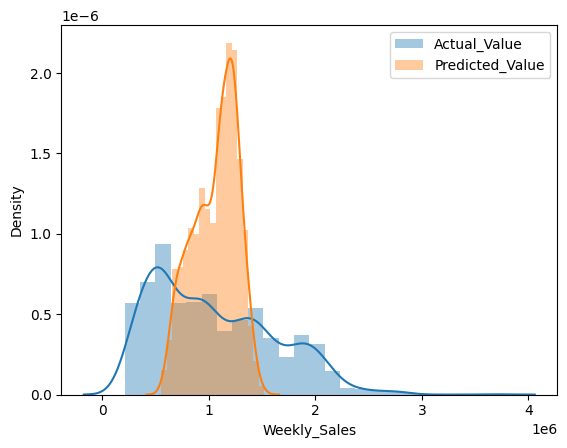

In [30]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(y_test,label='Actual_Value')
sns.distplot(y_pred1,label='Predicted_Value')
plt.legend()
plt.show()


As the graph shows,there is lot of difference between predicted and actual values.

#2. Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
y_pred2=dtr.predict(x_test)
difference2=pd.DataFrame(np.c_[y_test,y_pred2],columns=['Actual_Value','Predicted_Value'])
print(difference2)
print('-------------------------------------------------')

# Performance parameters
print('**Decision Tree Regressor Performance Parameters**')
print('-------------------------------------------------')
from sklearn.metrics import r2_score
dtr_pred1=r2_score(y_test,y_pred2)
print('r2_score is:',dtr_pred1)
print('-------------------------------------------------')
from sklearn import metrics
dtr_pred2=mean_abs_error=metrics.mean_absolute_error(y_test,y_pred2)
print('MAE:',dtr_pred2)
print('-------------------------------------------------')
from sklearn.metrics import mean_absolute_percentage_error
dtr_pred3=mean_absolute_percentage_error(y_test,y_pred2)
print('MAPE:',dtr_pred3)
print('-------------------------------------------------')

dtr_pred4=mean_sq_error=metrics.mean_squared_error(y_test,y_pred2)
print('MSE:',dtr_pred4)
print('-------------------------------------------------')
dtr_pred5=root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred2))
print('RMSE:',dtr_pred5)

      Actual_Value  Predicted_Value
0       1408464.08       1461393.91
1       1141184.66       1221318.17
2        561137.06        541292.64
3        377464.62        354270.77
4       1867403.01       1987089.36
...            ...              ...
1782    2160057.39       2141210.62
1783     691497.62        638647.21
1784    1497462.72       2270188.99
1785     590984.56        628115.61
1786    2727575.18       2034695.56

[1787 rows x 2 columns]
-------------------------------------------------
**Decision Tree Regressor Performance Parameters**
-------------------------------------------------
r2_score is: 0.8869496536052058
-------------------------------------------------
MAE: 96200.84641857863
-------------------------------------------------
MAPE: 0.0867031362944152
-------------------------------------------------
MSE: 36797527407.401054
-------------------------------------------------
RMSE: 191826.81618428914


Inference: Root mean square error (RMSE) of the Decision Tree Regressor is 196784.3425 and mean absolute percentage error(MAPE) is 8.70%.
**Accuracy(r2_score)** is much better than Linear Regression i.e. **88.1%**
So this is comparatively better model than Linear Regression.

# Graphical Representation of Actual & Predicted Sales_DTR

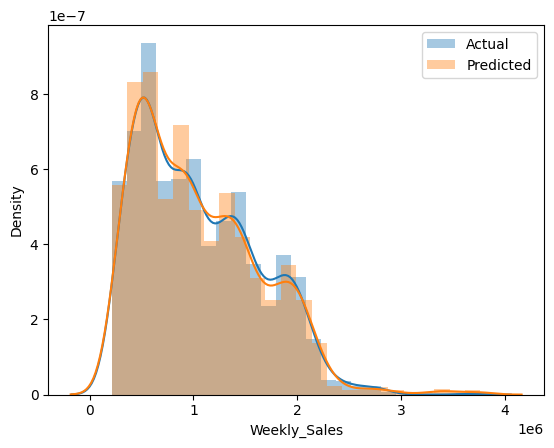

In [32]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(y_test,label='Actual')
sns.distplot(y_pred2,label='Predicted')
plt.legend()

From the above plot, we can infer that the values predicted are pretty close to the actual

#3.Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

rfr.fit(x_train,y_train)
y_pred3=rfr.predict(x_test)
difference3=pd.DataFrame(np.c_[y_test,y_pred3],columns=['Actual_Value','Predicted_Value'])
print(difference3)
print('-------------------------------------------------')


# Performance parameters
print('Random Forest Regressor Performance Parameters')
print('-------------------------------------------------')
from sklearn.metrics import r2_score
rfr_pred1=r2_score(y_test,y_pred3)
print('r2_score is:',rfr_pred1)
print('-------------------------------------------------')
from sklearn import metrics
rfr_pred2=mean_abs_error=metrics.mean_absolute_error(y_test,y_pred3)
print('MAE:',rfr_pred2)
print('-------------------------------------------------')
from sklearn.metrics import mean_absolute_percentage_error
rfr_pred3=mean_absolute_percentage_error(y_test,y_pred3)
print('MAPE:',rfr_pred3)
print('-------------------------------------------------')
rfr_pred4=mean_sq_error=metrics.mean_squared_error(y_test,y_pred3)
print('MSE:',rfr_pred4)
print('-------------------------------------------------')
rfr_pred5=root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred3))
print('RMSE',rfr_pred5)

      Actual_Value  Predicted_Value
0       1408464.08     1.419957e+06
1       1141184.66     1.199985e+06
2        561137.06     5.436646e+05
3        377464.62     3.700136e+05
4       1867403.01     1.948749e+06
...            ...              ...
1782    2160057.39     2.106554e+06
1783     691497.62     6.373229e+05
1784    1497462.72     2.095314e+06
1785     590984.56     6.340622e+05
1786    2727575.18     1.920082e+06

[1787 rows x 2 columns]
-------------------------------------------------
Random Forest Regressor Performance Parameters
-------------------------------------------------
r2_score is: 0.9391018235118669
-------------------------------------------------
MAE: 76389.25418337996
-------------------------------------------------
MAPE: 0.07018676221103434
-------------------------------------------------
MSE: 19822162336.037014
-------------------------------------------------
RMSE 140791.2012024793


Inference: Root mean square error (RMSE) of the Random Forest Regressor is 141401.08399 and mean absolute percentage error(MAPE) is 7.0%.
**Accuracy(r2_score)** is much better than Linear Regression i.e. **93.87%**
So this model is better than the above two models.

# Graphical Representation of Actual & Predicted Sales_RFR

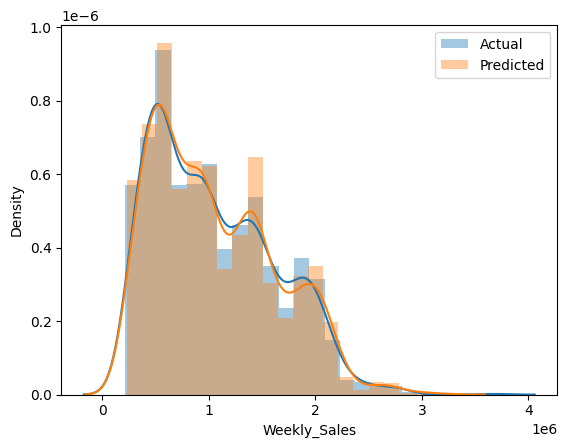

In [34]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred3,label='Predicted')
plt.legend()

From the above plot, we can infer that the values predicted are pretty close to the actual Random Forest Regressor

#4. XG Boost Regressor

In [35]:
from xgboost import XGBRegressor
xgb= XGBRegressor()
xgb.fit(x_train,y_train)
y_pred4= xgb.predict(x_test)

difference4=pd.DataFrame(np.c_[y_test,y_pred4],columns=['Actual_Value','Predicted_Value'])
print(difference4)
print('-------------------------------------------------')


# Performance parameters
print('XGBoost Regressor Performance Parameters')
print('-------------------------------------------------')
from sklearn.metrics import r2_score
xgb_pred1=r2_score(y_test,y_pred4)
print('r2_score is:',xgb_pred1)
print('-------------------------------------------------')
from sklearn import metrics
xgb_pred2=mean_abs_error=metrics.mean_absolute_error(y_test,y_pred4)
print('MAE:',xgb_pred2)
print('-------------------------------------------------')
from sklearn.metrics import mean_absolute_percentage_error
xgb_pred3=mean_absolute_percentage_error(y_test,y_pred4)
print('MAPE:',xgb_pred3)
print('-------------------------------------------------')
xgb_pred4=mean_sq_error=metrics.mean_squared_error(y_test,y_pred4)
print('MSE:',xgb_pred4)
print('-------------------------------------------------')
xgb_pred5=root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred4))
print('RMSE',xgb_pred5)

      Actual_Value  Predicted_Value
0       1408464.08     1.379161e+06
1       1141184.66     1.187609e+06
2        561137.06     5.479494e+05
3        377464.62     3.941978e+05
4       1867403.01     1.951699e+06
...            ...              ...
1782    2160057.39     2.113263e+06
1783     691497.62     7.616527e+05
1784    1497462.72     1.612279e+06
1785     590984.56     6.146465e+05
1786    2727575.18     2.198536e+06

[1787 rows x 2 columns]
-------------------------------------------------
XGBoost Regressor Performance Parameters
-------------------------------------------------
r2_score is: 0.9688877654906369
-------------------------------------------------
MAE: 62477.68147838556
-------------------------------------------------
MAPE: 0.07027306451994489
-------------------------------------------------
MSE: 10126933163.616526
-------------------------------------------------
RMSE 100632.6644962585


Inference: Root mean square error (RMSE) of the XGBoost Regressor is 100632.6644 and mean absolute percentage error(MAPE) is 7.02%.
**Accuracy(r2_score)** is highest among all algorithms i.e. **96.88%.**

So this model is the best among all with respect to the performance metrics.

# Graphical Representation of Actual & Predicted Sales_XGB

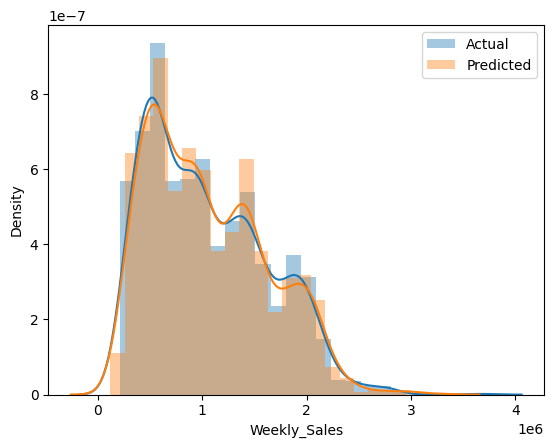

In [36]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred4,label='Predicted')
plt.legend()

# Comparison of of all Models with respect to Performance metrics

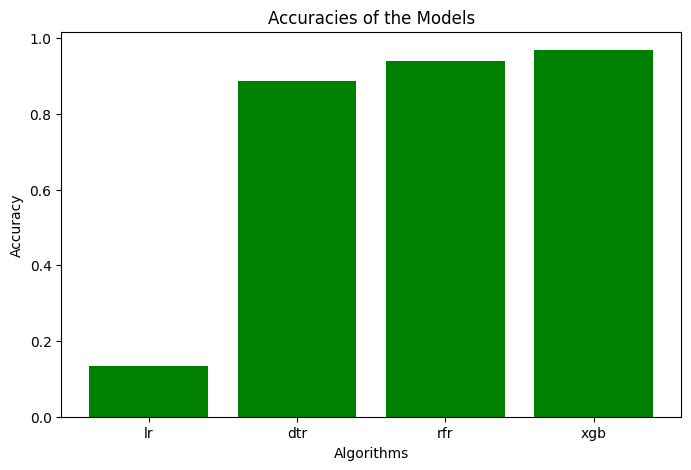

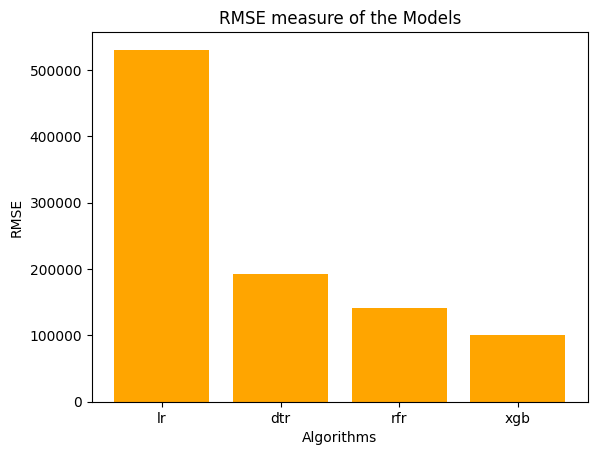

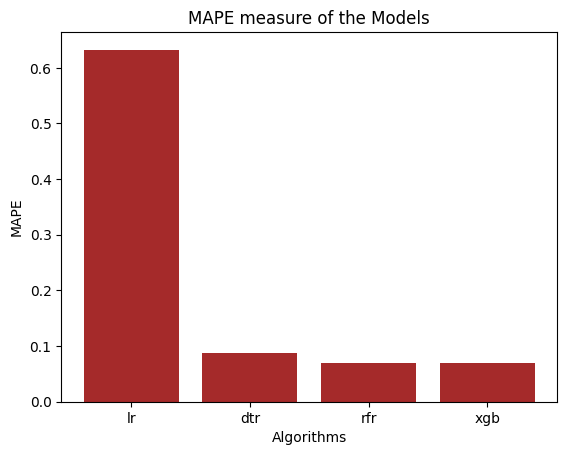

<Figure size 640x480 with 0 Axes>

In [39]:
# Comparison of Accuracies, RMSE and MAPE of all the three models
plt.figure(figsize=(8,5))
#r2_score or accuracies
plt.bar(x=['lr','dtr','rfr','xgb'],height=[pred1,dtr_pred1,rfr_pred1,xgb_pred1],color='green')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title('Accuracies of the Models')
plt.show()

#RMSE
plt.bar(x=['lr','dtr','rfr','xgb'],height=[pred5,dtr_pred5,rfr_pred5,xgb_pred5],color='orange')
plt.xlabel("Algorithms")
plt.ylabel("RMSE")
plt.title('RMSE measure of the Models')
plt.show()

#MAPE
plt.bar(x=['lr','dtr','rfr','xgb'],height=[pred3,dtr_pred3,rfr_pred3,xgb_pred3],color='brown')
plt.xlabel("Algorithms")
plt.ylabel("MAPE")
plt.title('MAPE measure of the Models')
plt.show()
plt.tight_layout()

In [40]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preparing data for forecasting

In [41]:
# Original Dataset
orig_df=pd.read_csv('Walmart (1).csv')
orig_df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [42]:
time_data = orig_df[['Date','Weekly_Sales']]
time_data.columns = ['ds','y']
time_data.head()

ds           y
0  05-02-2010  1643690.90
1  12-02-2010  1641957.44
2  19-02-2010  1611968.17
3  26-02-2010  1409727.59
4  05-03-2010  1554806.68

In [43]:
orig_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [44]:
regressors_df = orig_df[['Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
regressors_df = regressors_df.rename(columns={'Date':'ds'})
merged_df = pd.merge(time_data,regressors_df,on='ds',how='left')

In [45]:
merged_df.head()

ds          y  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0  05-02-2010  1643690.9             0        42.31       2.572  211.096358   
1  05-02-2010  1643690.9             0        40.19       2.572  210.752605   
2  05-02-2010  1643690.9             0        45.71       2.572  214.424881   
3  05-02-2010  1643690.9             0        43.76       2.598  126.442065   
4  05-02-2010  1643690.9             0        39.70       2.572  211.653972   

   Unemployment  
0         8.106  
1         8.324  
2         7.368  
3         8.623  
4         6.566

# Adding Regressors

In [46]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.add_regressor('Holiday_Flag')
m.add_regressor('Temperature')
m.add_regressor('Fuel_Price')
m.add_regressor('CPI')
m.add_regressor('Unemployment')
model_fit = m.fit(merged_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprr1itrpv/dpowr1wf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprr1itrpv/hiayxgso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6834', 'data', 'file=/tmp/tmprr1itrpv/dpowr1wf.json', 'init=/tmp/tmprr1itrpv/hiayxgso.json', 'output', 'file=/tmp/tmprr1itrpv/prophet_modelg1caipps/prophet_model-20230619105652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:56:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Predicting Model

In [47]:
forecast = model_fit.predict(merged_df)
forecast[['ds','yhat','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']].tail()

ds          yhat  Holiday_Flag  Temperature   Fuel_Price  \
289570 2012-12-10  1.123596e+06           0.0 -5164.884773 -7689.946299   
289571 2012-12-10  1.130823e+06           0.0 -4297.559296 -1680.189193   
289572 2012-12-10  1.134496e+06           0.0  6208.270271 -4646.943566   
289573 2012-12-10  1.137361e+06           0.0  7215.486954 -4646.943566   
289574 2012-12-10  1.134250e+06           0.0   337.502661 -1694.052531   

                CPI  Unemployment  
289570 -1252.539569   1365.377254  
289571  1562.118633  -1099.297910  
289572 -1011.027067  -2392.150685  
289573 -1011.027067   -534.489449  
289574 -1252.539569    521.267905

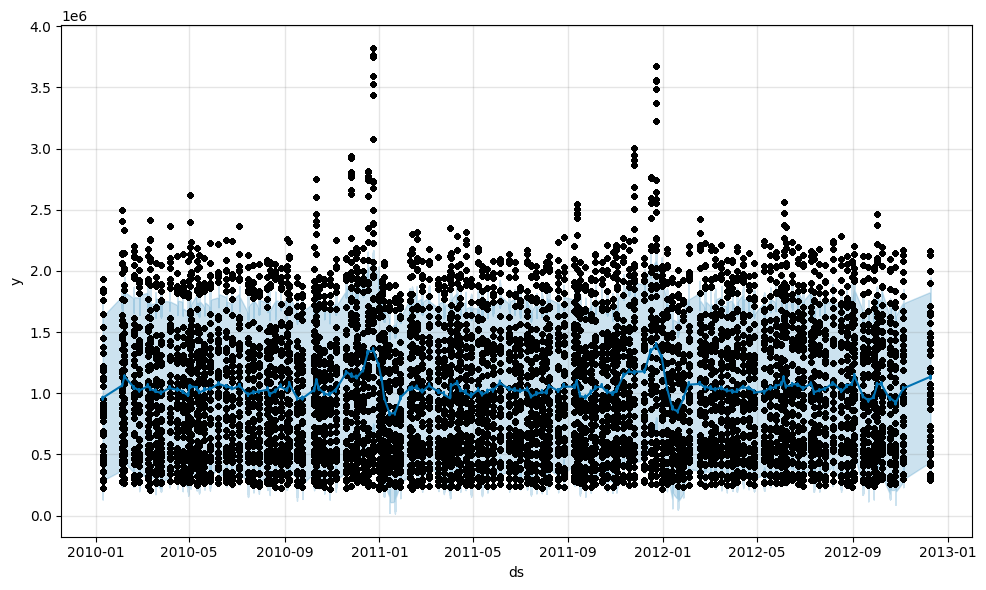

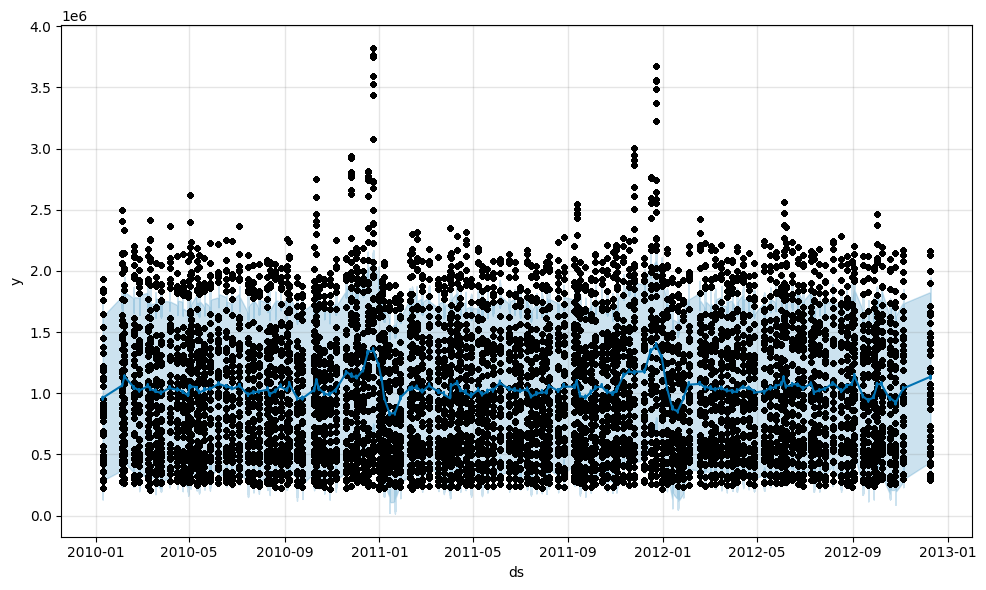

In [48]:
model_fit.plot(forecast)

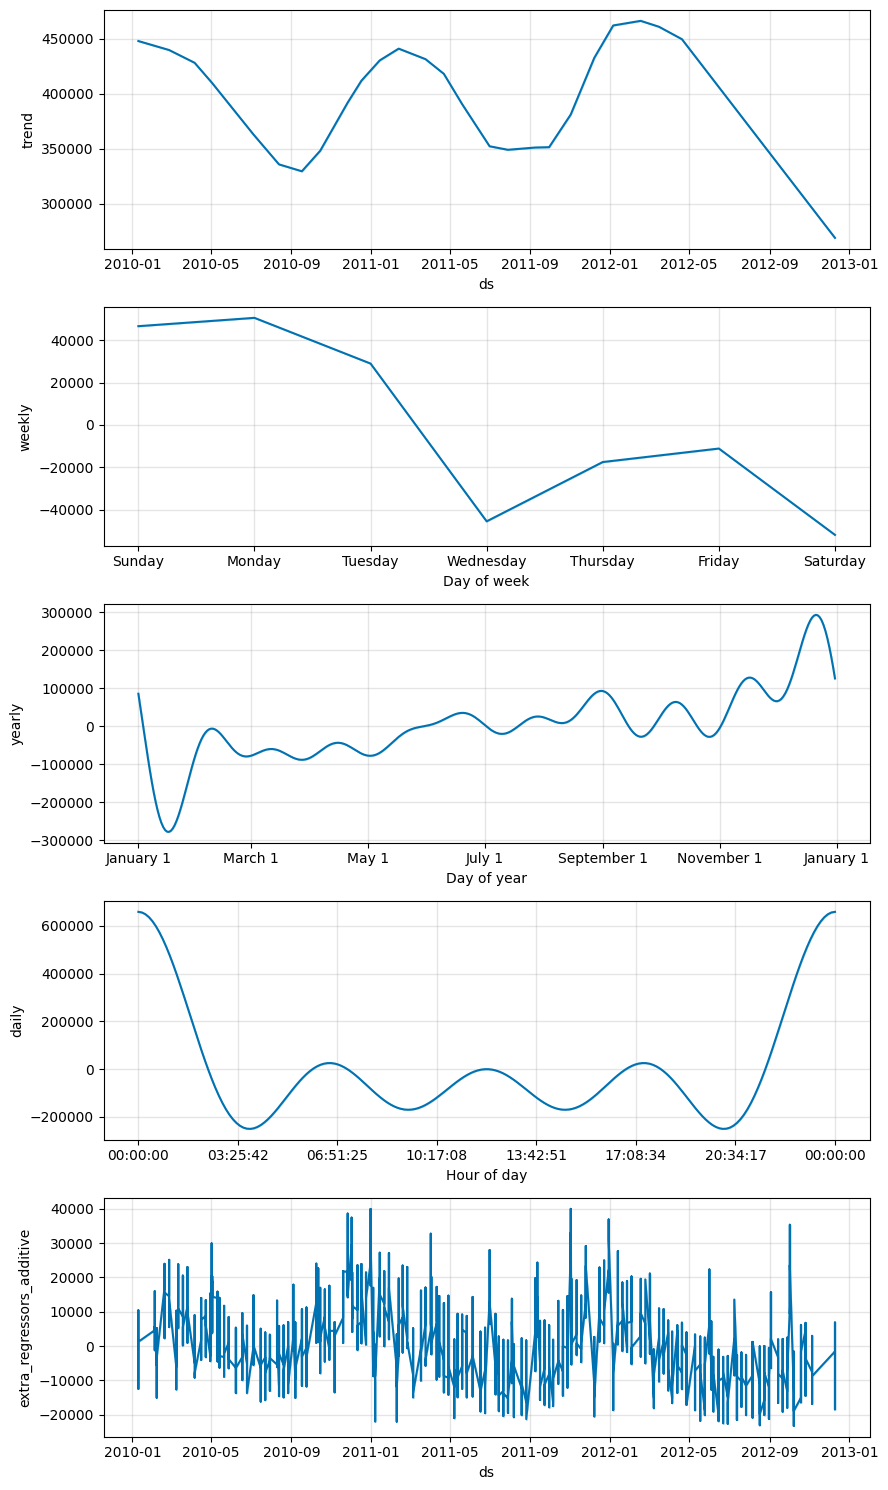

In [49]:
model_fit.plot_components(forecast);

In [50]:
predictions = forecast[['ds','yhat']]
predictions = predictions.rename(columns = {'ds':'Date','yhat':'Weekly_Sales'})
predictions.head()

Date   Weekly_Sales
0 2010-01-10  961261.488821
1 2010-01-10  954127.017366
2 2010-01-10  960783.975720
3 2010-01-10  961033.515808
4 2010-01-10  960041.168324

In [51]:
time_data['ds'] = pd.to_datetime(time_data['ds'])
predictions['Date'] = pd.to_datetime(predictions['Date'])

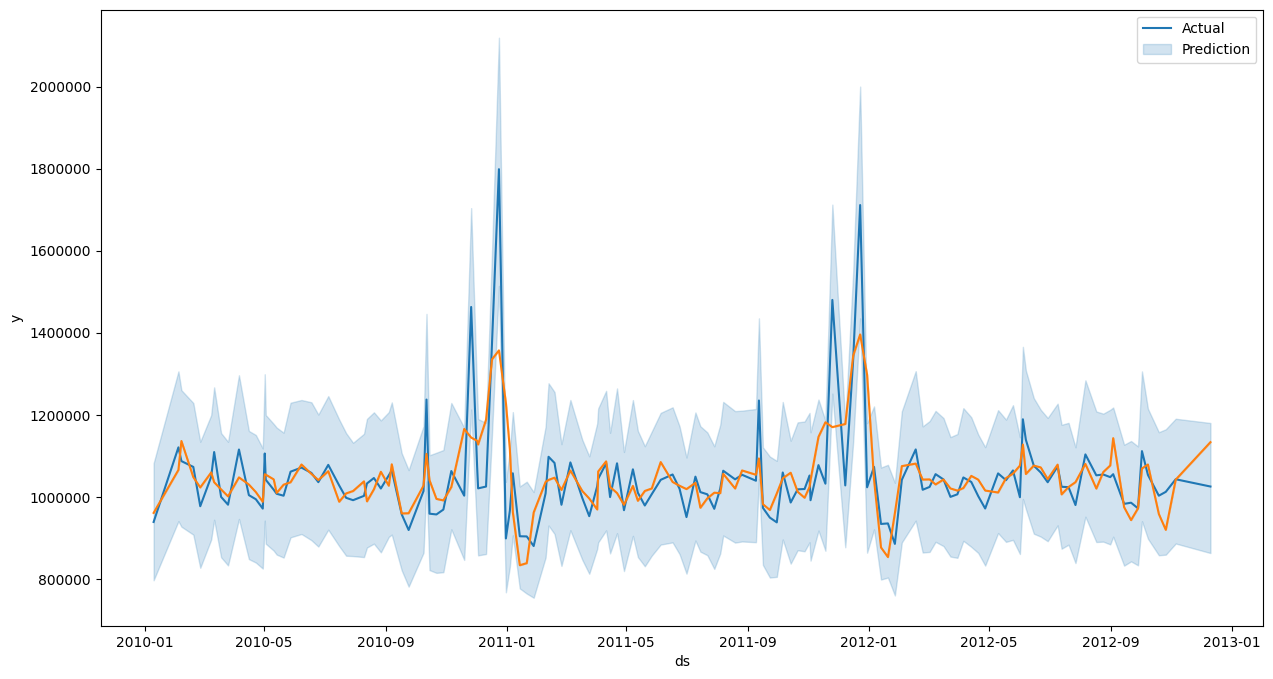

In [52]:
plt.subplots(figsize = (15,8))
sns.lineplot(data=time_data,x = 'ds',y='y',legend='full')
sns.lineplot(data=predictions ,x ='Date',y ='Weekly_Sales',legend='full')
plt.legend(labels =['Actual','Prediction'])
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

In [53]:
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions['Year'] = predictions['Date'].dt.year
predictions['Month'] = predictions['Date'].dt.month
predictions['MonthName'] = predictions['Date'].dt.month_name()
predictions['Week'] = predictions['Date'].dt.week

In [54]:
predictions.head()

Date   Weekly_Sales  Year  Month MonthName  Week
0 2010-01-10  961261.488821  2010      1   January     1
1 2010-01-10  954127.017366  2010      1   January     1
2 2010-01-10  960783.975720  2010      1   January     1
3 2010-01-10  961033.515808  2010      1   January     1
4 2010-01-10  960041.168324  2010      1   January     1

In [55]:
predictions.shape

(289575, 6)

In [56]:
x_time = predictions.drop(columns=['Date','Weekly_Sales','MonthName'])
y_time = predictions[['Weekly_Sales']]

In [57]:
x_time_train,x_time_test,y_time_train,y_time_test = train_test_split(x_time,y_time,test_size=0.2,random_state=20)

# Evaluating Model

In [58]:
xgb_time_model = XGBRegressor()
xgb_time_model.fit(x_time_train,y_time_train)
xgb_time_pred = xgb_time_model.predict(x_time_test)

In [59]:
x_time_train.shape,y_time_train.shape,x_time_test.shape,y_time_test.shape,xgb_time_pred.shape

((231660, 3), (231660, 1), (57915, 3), (57915, 1), (57915,))

In [60]:

# Performance parameters
print('Updated XGBoost Regressor Performance Parameters')
print('-------------------------------------------------')
from sklearn.metrics import r2_score
uxgb_pred1=r2_score(y_time_test,xgb_time_pred)
print('r2_score is:',uxgb_pred1)
print('-------------------------------------------------')
from sklearn import metrics
uxgb_pred2=mean_abs_error=metrics.mean_absolute_error(y_time_test,xgb_time_pred)
print('MAE:',uxgb_pred2)
print('-------------------------------------------------')
from sklearn.metrics import mean_absolute_percentage_error
uxgb_pred3=mean_absolute_percentage_error(y_time_test,xgb_time_pred)
print('MAPE:',uxgb_pred3)
print('-------------------------------------------------')
uxgb_pred4=mean_sq_error=metrics.mean_squared_error(y_time_test,xgb_time_pred)
print('MSE:',uxgb_pred4)
print('-------------------------------------------------')
uxgb_pred5=root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_time_test,xgb_time_pred))
print('RMSE',uxgb_pred5)

Updated XGBoost Regressor Performance Parameters
-------------------------------------------------
r2_score is: 0.9599147076028937
-------------------------------------------------
MAE: 8948.589498147574
-------------------------------------------------
MAPE: 0.00857994354004635
-------------------------------------------------
MSE: 280732507.572254
-------------------------------------------------
RMSE 16755.074084355878


In [61]:
Comparison = x_time_test.copy("deep")
Comparison['Actual Sales'] = y_time_test
Comparison['Predicted Sales'] = xgb_time_pred
Comparison.head()


Year  Month  Week  Actual Sales  Predicted Sales
251272  2012      6    26  1.047011e+06     1.043161e+06
212922  2012      2     7  1.086424e+06     1.080936e+06
155918  2011      7    29  9.883808e+05     9.962658e+05
234202  2012      4    17  1.011506e+06     1.015300e+06
216083  2012      2     8  1.039090e+06     1.042057e+06

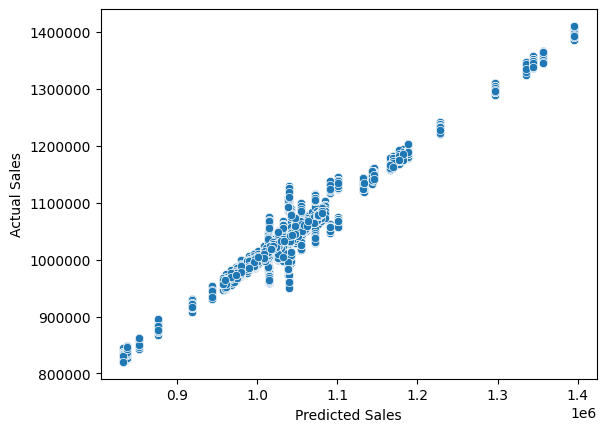

In [62]:
sns.scatterplot(Comparison,x='Predicted Sales',y='Actual Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

# Part-II: Forecasting Sales for each store for the next 12 weeks

In [63]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**# Preparing data for Pre-processsing**

In [64]:
df2=pd.read_csv('Walmart (1).csv')
df2
time_data= df2[['Date','Weekly_Sales']]
time_data.columns = ['ds','y']
time_data.head()

ds           y
0  05-02-2010  1643690.90
1  12-02-2010  1641957.44
2  19-02-2010  1611968.17
3  26-02-2010  1409727.59
4  05-03-2010  1554806.68

In [65]:
df2.keys()

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [66]:
regressors_df = df2[['Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
regressors_df = regressors_df.rename(columns={'Date':'ds'})
merged_df = pd.merge(time_data,regressors_df,on='ds',how='left')
merged_df.head()

ds          y  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0  05-02-2010  1643690.9             0        42.31       2.572  211.096358   
1  05-02-2010  1643690.9             0        40.19       2.572  210.752605   
2  05-02-2010  1643690.9             0        45.71       2.572  214.424881   
3  05-02-2010  1643690.9             0        43.76       2.598  126.442065   
4  05-02-2010  1643690.9             0        39.70       2.572  211.653972   

   Unemployment  
0         8.106  
1         8.324  
2         7.368  
3         8.623  
4         6.566

# Adding Regressors


In [67]:
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
m = Prophet(daily_seasonality=True)
m.add_regressor('Holiday_Flag')
m.add_regressor('Temperature')
m.add_regressor('Fuel_Price')
m.add_regressor('CPI')
m.add_regressor('Unemployment')
model_fit = m.fit(merged_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprr1itrpv/dyus4ji7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprr1itrpv/pc_4rs3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98497', 'data', 'file=/tmp/tmprr1itrpv/dyus4ji7.json', 'init=/tmp/tmprr1itrpv/pc_4rs3k.json', 'output', 'file=/tmp/tmprr1itrpv/prophet_model3twh3oni/prophet_model-20230619111238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Predicting Model

In [68]:
m2 = Prophet(daily_seasonality=True)
m2.fit(time_data)
future = m2.make_future_dataframe(periods = 84)
future.tail(10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprr1itrpv/9_rozp7_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprr1itrpv/zbdw6yud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8966', 'data', 'file=/tmp/tmprr1itrpv/9_rozp7_.json', 'init=/tmp/tmprr1itrpv/zbdw6yud.json', 'output', 'file=/tmp/tmprr1itrpv/prophet_modelrnqzgg6t/prophet_model-20230619111711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:17:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds
217 2013-02-23
218 2013-02-24
219 2013-02-25
220 2013-02-26
221 2013-02-27
222 2013-02-28
223 2013-03-01
224 2013-03-02
225 2013-03-03
226 2013-03-04

In [69]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

ds          yhat    yhat_upper     yhat_lower
222 2013-02-28  1.002152e+06  1.694421e+06  292782.511005
223 2013-03-01  1.001988e+06  1.713571e+06  352062.855912
224 2013-03-02  9.662938e+05  1.706567e+06  246541.093807
225 2013-03-03  1.053185e+06  1.774179e+06  393369.789994
226 2013-03-04  1.056486e+06  1.749118e+06  347917.448699

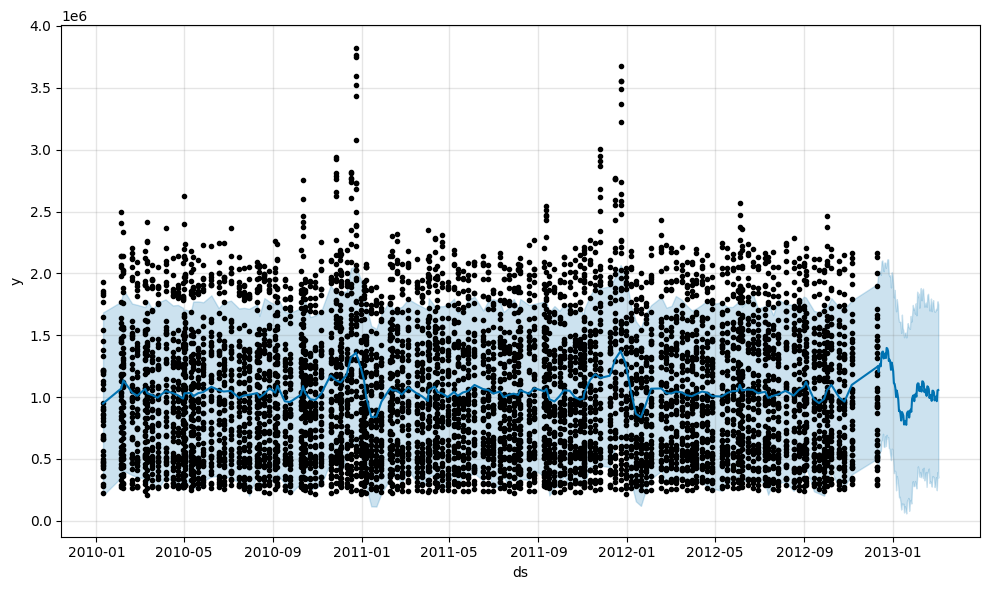

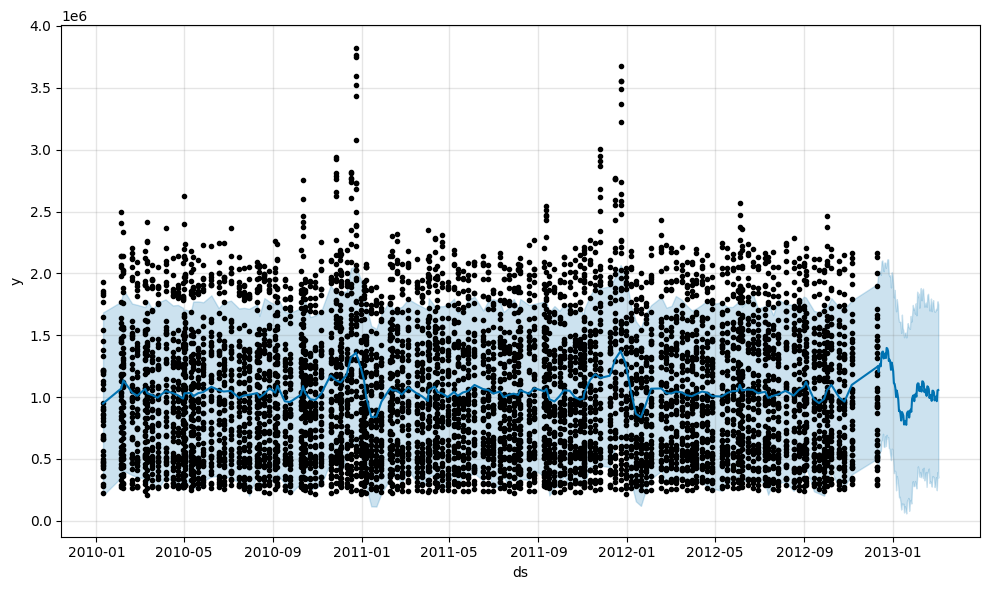

In [70]:
m2.plot(forecast2)

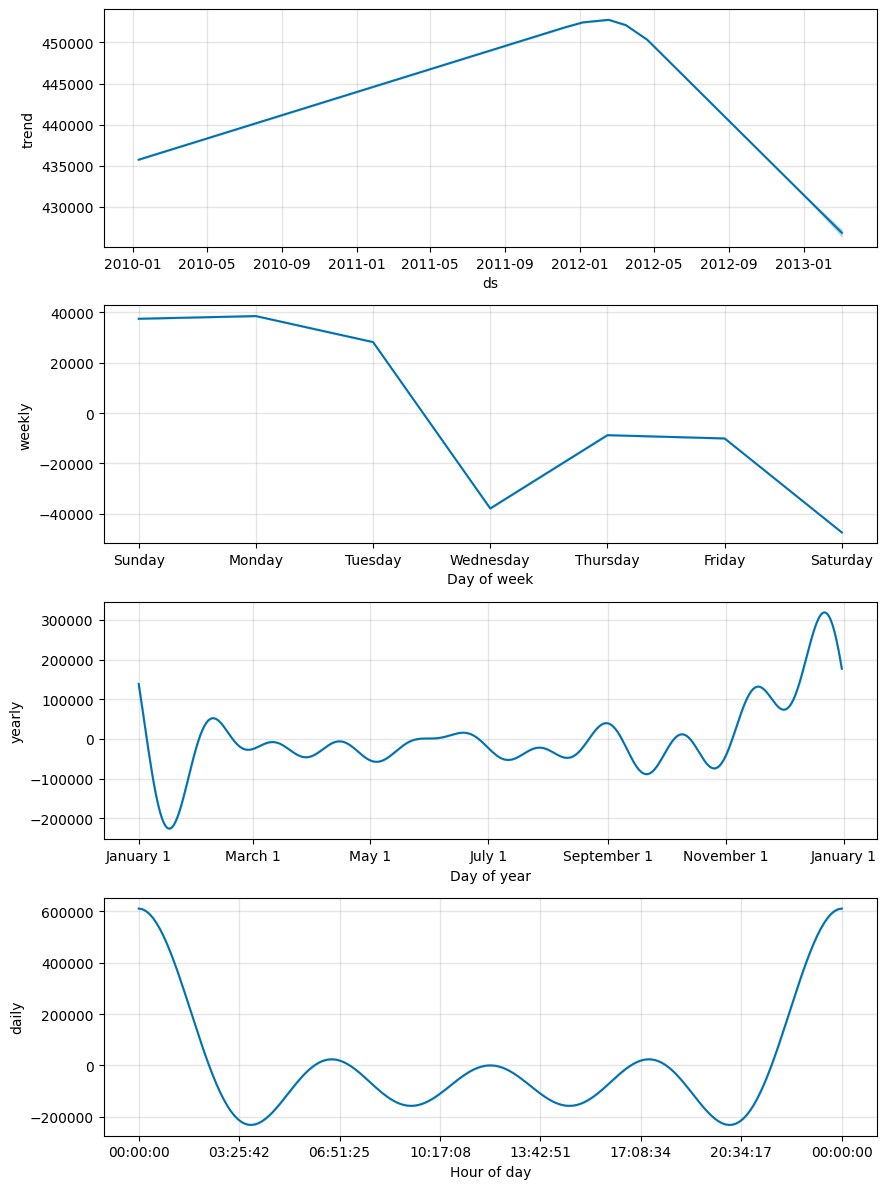

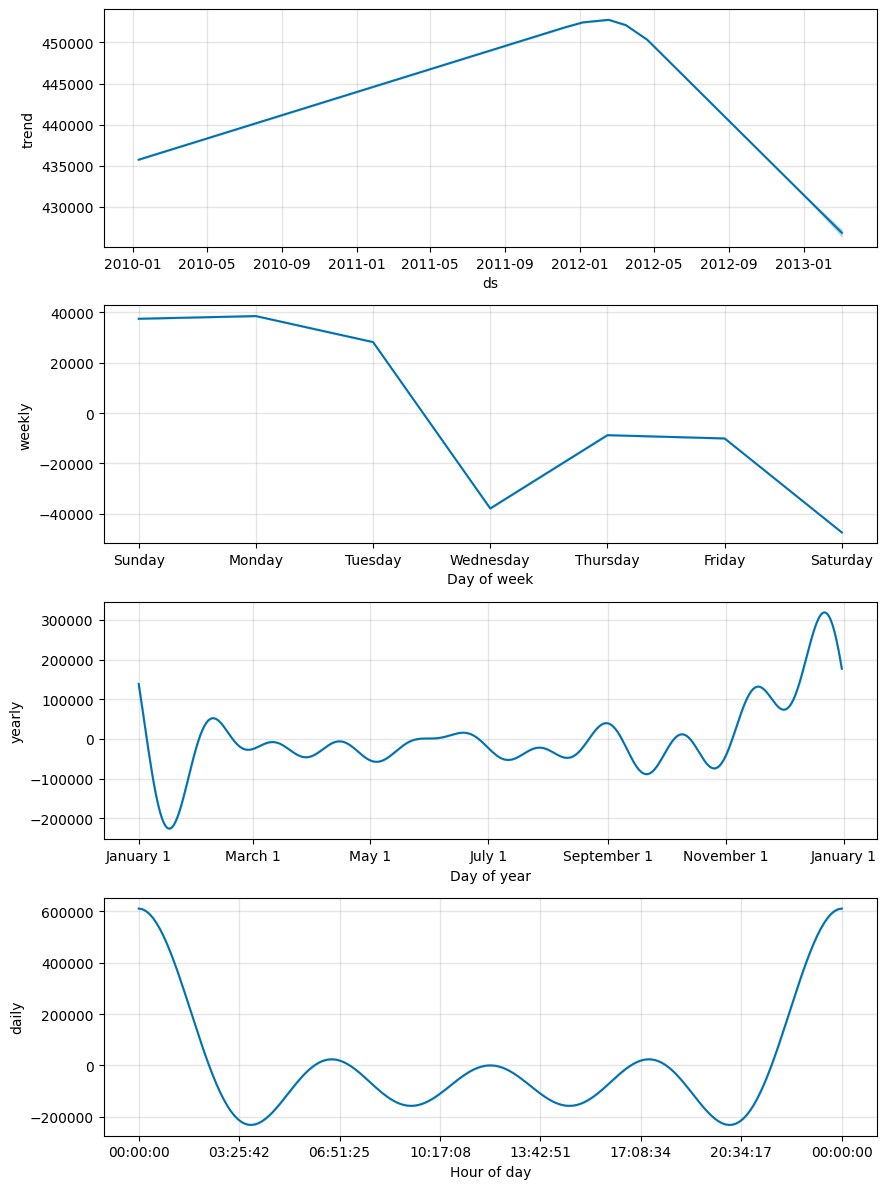

In [71]:
m2.plot_components(forecast2)

# Conclusion:

1. XG Boost Regression is not only fast but also efficient for time series model evaluation. It provides best results, and the company can trust the forecasting.
2. High sales in the prediction were observed in the end of the year 2012, and for the upcoming weeks, sales will fall down but recover quickly.
3. This forecast tells that there is a presence of seasonality. Every end of the year is good for sales, and every start of the year brings some fall in the sales and then recovery.